<a href="https://colab.research.google.com/github/kohtetap/MMDT_2025_MLAI101/blob/htet-aung-phyo/Htet-Aung-Phyo/Linear_Model/Lab2_LinearModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please answer the following questions based on your analysis:

a) Which advertising channel has the least impact on sales volume?
Provide evidence from your analysis and explain your reasoning.

b) If we increase the amount spent on TV advertising by one dollar, while keeping the amounts spent on radio and newspaper advertising constant, what will be the expected change in sales volume?
Support your answer with your findings and explain your reasoning clearly.

In [56]:
# importing required package
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#importing dataframe
df=pd.read_csv('/Advertising.csv')
print(df.columns)

# setting X and y
X=df[['TV', 'radio', 'newspaper']].values
y=df['sales'].values

# splitting training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                    test_size = 0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape,y_test.shape)
print(len(df))

# creating dataframe
model_df =pd.DataFrame(columns=['name','weight_TV', 'weight_radio', 'weight_newspaper','intercept','mae','mse','r_squared'])

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')
(140, 3) (140,)
(60, 3) (60,)
200


In [71]:
## feature scaling using x_scalted = (x-u)/std

scale = StandardScaler()
X_scaled = scale.fit_transform(X_train)

X_test_scaled = scale.transform(X_test)

In [73]:
## linear regression model using standardized x
lr = LinearRegression()
lr.fit(X_scaled, y_train)

# finding mae,mse and r2 for training data
ytrain_pred = lr.predict(X_scaled)
mae = mean_absolute_error(y_train, ytrain_pred)

mse = mean_squared_error(y_train, ytrain_pred)

r2 = r2_score(y_train, ytrain_pred)

model_df.loc[0] = ['scaled_train',lr.coef_[0],lr.coef_[1],lr.coef_[2],lr.intercept_, mae, mse, r2]
print(model_df)

             name  weight_TV  weight_radio  weight_newspaper  intercept  \
0    scaled_train   3.683341      2.906252          0.141948  14.497143   
1     scaled_test   3.683341      2.906252          0.141948  14.497143   
3  unscaled_train   0.044059      0.199287          0.141948  14.497143   
4   unscaled_test   0.044059      0.199287          0.141948  14.497143   

        mae       mse  r_squared  
0  1.158150  2.479355   0.905516  
1  1.511669  3.796797   0.860947  
3  1.158150  2.479355   0.905516  
4  1.511669  3.796797   0.860947  


 y = 3.68 * x1 + 2.91 * x2 + 0.14 * x3 + 14.50
 where, x1 = TV, x2 = Radio, x3 = newspaper

In [74]:
# testing model

# predicting y_test data
ytest_pred = lr.predict(X_test_scaled)

# finding mae between y_test and ytest_pred
mae = mean_absolute_error(y_test, ytest_pred)

# finding mse between y_test and ytest_pred
mse = mean_squared_error(y_test, ytest_pred)

#finding r2 score
r2 = r2_score(y_test, ytest_pred)

model_df.loc[1] = ['scaled_test',lr.coef_[0],lr.coef_[1],lr.coef_[2],lr.intercept_, mae, mse, r2]
model_df

,name,weight_TV,weight_radio,weight_newspaper,intercept,mae,mse,r_squared
0,scaled_train,3.683341,2.906252,0.141948,14.497143,1.158150,2.479355,0.905516
1,scaled_test,3.683341,2.906252,0.141948,14.497143,1.511669,3.796797,0.860947
3,unscaled_train,0.044059,0.199287,0.141948,14.497143,1.158150,2.479355,0.905516
4,unscaled_test,0.044059,0.199287,0.141948,14.497143,1.511669,3.796797,0.860947


In [78]:
lr_unscaled = LinearRegression()
lr_unscaled.fit(X_train,y_train)

# finding mae,mse and r2 for training data
ytrain_pred = lr_unscaled.predict(X_train)

mae = mean_absolute_error(y_train, ytrain_pred)

mse = mean_squared_error(y_train, ytrain_pred)

r2 = r2_score(y_train, ytrain_pred)

model_df.loc[3] = ['unscaled_train',lr_unscaled.coef_[0],lr_unscaled.coef_[1],lr_unscaled.coef_[2],lr_unscaled.intercept_, mae, mse, r2]
print(model_df)

             name  weight_TV  weight_radio  weight_newspaper  intercept  \
0    scaled_train   3.683341      2.906252          0.141948  14.497143   
1     scaled_test   3.683341      2.906252          0.141948  14.497143   
3  unscaled_train   0.044059      0.199287          0.006882   2.708949   
4   unscaled_test   0.044059      0.199287          0.006882   2.708949   

        mae       mse  r_squared  
0  1.158150  2.479355   0.905516  
1  1.511669  3.796797   0.860947  
3  1.158150  2.479355   0.905516  
4  1.511669  3.796797   0.860947  


In [79]:
ytest_pred = lr_unscaled.predict(X_test)

mae = mean_absolute_error(y_test, ytest_pred)

mse = mean_squared_error(y_test, ytest_pred)

r2 = r2_score(y_test, ytest_pred)

model_df.loc[4] = ['unscaled_test',lr_unscaled.coef_[0],lr_unscaled.coef_[1],lr_unscaled.coef_[2],lr_unscaled.intercept_, mae, mse, r2]
print(model_df)

             name  weight_TV  weight_radio  weight_newspaper  intercept  \
0    scaled_train   3.683341      2.906252          0.141948  14.497143   
1     scaled_test   3.683341      2.906252          0.141948  14.497143   
3  unscaled_train   0.044059      0.199287          0.006882   2.708949   
4   unscaled_test   0.044059      0.199287          0.006882   2.708949   

        mae       mse  r_squared  
0  1.158150  2.479355   0.905516  
1  1.511669  3.796797   0.860947  
3  1.158150  2.479355   0.905516  
4  1.511669  3.796797   0.860947  


a) Which advertising channel has the least impact on sales volume? Provide evidence from your analysis and explain your reasoning.

Using linear regression using standardized data, Among three features (TV, radio and newspaper), newspaper channel has the least impact on sales volume since it can be seen thant there is only 0.14 for coefficient or weight for newspaper while there are 3.68 for TV and 2.91 for radio.

{'TV': 3.6833407810865877, 'radio': 2.9062524207719327, 'newspaper': 0.14194771902905523}


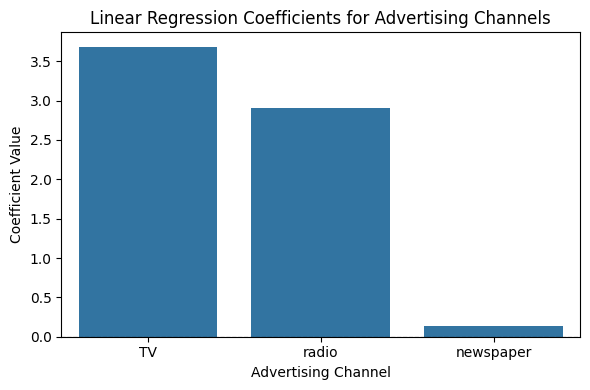

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get coefficients and intercept
coef = lr.coef_
intercept = lr.intercept_

# Display results
feature_names = df.columns[1:4]
coef_dict={}

for name, c in zip(feature_names, coef):
    coef_dict[name]=float(c)
print(coef_dict)

coef_series = pd.Series(coef_dict)

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x=coef_series.index, y=coef_series.values)
plt.title('Linear Regression Coefficients for Advertising Channels')
plt.ylabel('Coefficient Value')
plt.xlabel('Advertising Channel')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.tight_layout()
plt.show()

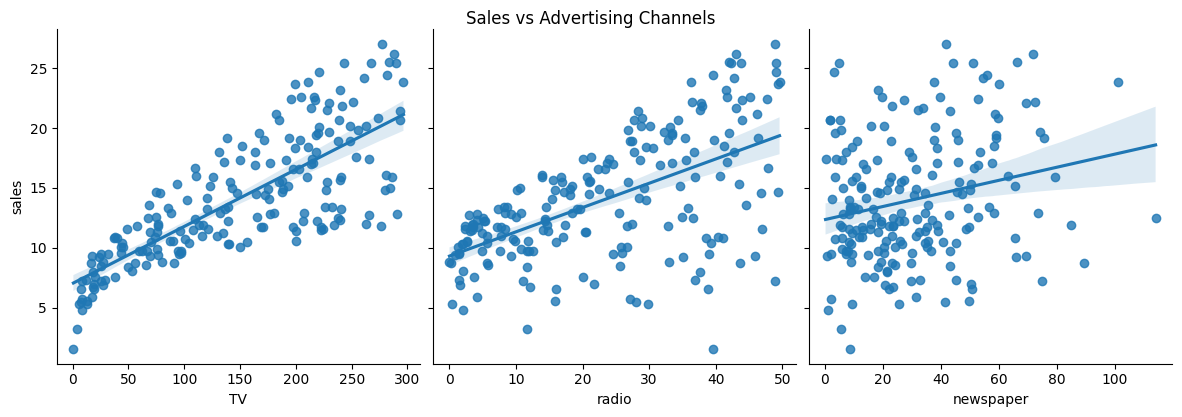

In [32]:
sns.pairplot(df, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', height=4, kind='reg')
plt.suptitle('Sales vs Advertising Channels', y=1.02)
plt.show()

b) If we increase the amount spent on TV advertising by one dollar, while keeping the amounts spent on radio and newspaper advertising constant, what will be the expected change in sales volume? Support your answer with your findings and explain your reasoning clearly.

In [82]:
coef_tv = lr.coef_[0]
std_tv = scale.scale_[0]
print(coef_tv)

change_in_sales_tv = coef_tv / std_tv

print(f"Expected change in sales for $1 increase in TV ad: {change_in_sales_tv:.3f} units")

3.6833407810865877
Expected change in sales for $1 increase in TV ad: 0.044 units


if the amount spent on radio and newspaper advertising constant, increasing spending one dollar for TV can increase the sale volumes by 0.044 units. At first, I think i should be the coefficient of TV (3.68) but it was value from standardized data. So, it should be calculated back to raw data format by dividing with standard deviation of that feature. so, it becomes 0.044. Suprisingly, this value equals to the coefficient value from modelling of unstandardized data.

In [85]:
change_in_sales_radio = lr.coef_[1]/scale.scale_[1]
print(f"Expected change in sales for $1 increase in Radio ad: {change_in_sales_radio:.3f} units")

Expected change in sales for $1 increase in Radio ad: 0.199 units


In [88]:
change_in_sales_newspaper = lr.coef_[2]/scale.scale_[2]
print(f"Expected change in sales for $1 increase in Radio ad: {change_in_sales_newspaper:.3f} units")

Expected change in sales for $1 increase in Radio ad: 0.007 units
